In [2]:
from visualisation import *
from DiffusionGeometry import *
# from utils import *
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import collections as mc
# import torch
# import matlab.engine
# eng = matlab.engine.start_matlab()
np.set_printoptions(suppress=True)
plt.set_cmap('PRGn')

<Figure size 640x480 with 0 Axes>

Create data.

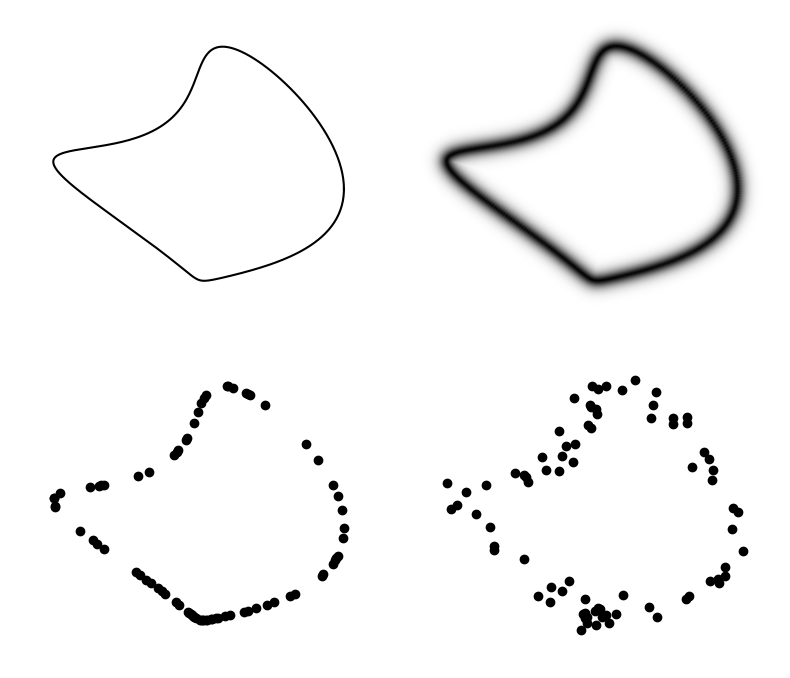

In [203]:
n = 400

theta = np.linspace(0, 2*np.pi, n)
data = np.array([[np.cos(x), np.sin(x)] for x in theta]) #+ 0.05*np.random.randn(xx.shape[0], 2)
data += 0.3*np.array([[np.cos(1*x), np.sin(2*x)] for x in theta])
data += 0.15*np.array([[np.cos(3*x), np.sin(1*x)] for x in theta]) @ np.array([[2,-1],[0,1]])
# data += 0.2*data**2

data -= np.median(data, axis=0)



# data -= np.median(data, axis = 0)
# data = 1*np.array([[np.cos(x)/(1 + np.sin(x)**2), np.sin(x)*np.cos(x)/(1 + np.sin(x)**2)] for x in xx]) + 0.05*np.random.randn(xx.shape[0], 2) + 0.1*data

# data = np.concatenate((data,0.3*(data + 0.05*np.random.randn(n,2))), axis = 0)
# # data = np.concatenate((data,0.4*np.random.randn(10,2)), axis = 0)

ind = np.arange(n)
np.random.shuffle(ind)
data1 = data[ind][::5]
np.random.shuffle(ind)
data2 = data[ind][::5] + 0.1*np.random.randn(n//5, 2)
lim_x = np.absolute(data1[:,0]).max()*1.3
lim_y = np.absolute(data1[:,0]).max()*1.1
# lim = 2

x, y = np.meshgrid(np.arange(-lim_x,lim_x,0.01),np.arange(-lim_y,lim_y,0.01))
x_diff = (x.reshape(x.shape[0],x.shape[1],1) - data[:,0].reshape(1,1,-1))
y_diff = (y.reshape(y.shape[0],y.shape[1],1) - data[:,1].reshape(1,1,-1))
norm_diff = x_diff**2 + y_diff**2
exp = np.exp(-norm_diff**0.7/ 0.03)
# diff = norm_diff.min(axis=-1)
heatmap = exp.max(axis=-1)
heatmap -= heatmap.min()
heatmap /= heatmap.max()

fig, ax = plt.subplots(2, 2, figsize = (8,7))
ax[0,0].plot(data[:,0], data[:,1], c = 'k')
ax[0,1].imshow(-heatmap[::-1], cmap='gray')
ax[1,0].scatter(data1[:,0], data1[:,1], c = 'k')
ax[1,1].scatter(data2[:,0], data2[:,1], c = 'k')
for i in [(0,0),(1,0),(1,1)]:
    ax[i].set_aspect('equal')
    ax[i].axis('off')
    ax[i].set_xlim(-lim_x, lim_x)
    ax[i].set_ylim(-lim_y, lim_y)
ax[0,1].axis('off')
fig.tight_layout()

In [204]:
import plotly.express as px
import plotly.graph_objects as go

n = 100

R = 2
r = 0.4

angle = np.linspace(0, 2*np.pi, 13)
theta, phi = np.meshgrid(angle, angle)
X = (R + r * np.cos(phi)) * np.cos(theta)
Y = (R + r * np.cos(phi)) * np.sin(theta)  
Z = r * np.sin(phi)


phi = np.random.uniform(0, 2*np.pi, n)
theta = np.random.uniform(0, 2*np.pi, n)
X = (R + r * np.cos(phi)) * np.cos(theta)
Y = (R + r * np.cos(phi)) * np.sin(theta)
Z = r * np.sin(phi)

data = np.stack((X.flatten(),Y.flatten(),Z.flatten()), axis = 1)

# data = np.concatenate((data,0.3*(data + 0.05*np.random.randn(100,2))), axis = 0)
# data = np.concatenate((data,0.4*np.random.randn(10,2)), axis = 0)

# # plot_3d(data)

# fig = px.scatter_3d(x = data[:,0],
#                     y = data[:,1],
#                     z = data[:,2])
# fig.update_traces(marker_size = 3)
# # layout = go.Layout(yaxis=dict(scaleanchor="x", scaleratio=1),
# #                    zaxis=dict(scaleanchor="x", scaleratio=1))
# fig.update_yaxes(scaleanchor="x", scaleratio=1)
# fig.update_zaxes(scaleanchor="x", scaleratio=1)

def plot_3d(data):
    fig = go.Figure(data=[go.Scatter3d(x = data[:,0],
                                    y = data[:,1],
                                    z = data[:,2],
                                    mode='markers')])
    fig.update_traces(marker_size = 3)
    fig.update_layout(scene_aspectmode='data')
    fig.show()

plot_3d(data)

In [205]:
parameters = {}
parameters['n'] = data.shape[0]
parameters['n0'] = 50
parameters['n1'] = 16
parameters['n2'] = 16

n,n0,n1,n2 = parameters['n'], parameters['n0'], parameters['n1'], parameters['n2']

def Del0(x, epsilon, n, alpha = 1):
    d = squareform(pdist(x))
    # if epsilon is None:
    #     k = 1 + np.ceil(np.log(n))
    #     epsilon = np.mean(np.partition(d, k, axis=0)[:k, :])
    d = np.exp(-d**2 / (4*epsilon**2))
    if not alpha == 0:
        D = diags(1 / np.sum(d, axis=1) ** alpha)
        d = D @ d @ D
    D = np.sum(d, axis=1)
    l, u = eigsh(d, n, diags(D), which = 'LM')
    l = - np.log(l) / epsilon**2
    return u.T[::-1], l[::-1], D

u, lam, D = Del0(data, 0.17, n0, alpha=1)
print(lam)

# d = squareform(pdist(data))
# d = np.exp(-d**2 / (4*0.2**2))
# D = np.sum(d, axis=1)
# l, u = eigsh(d, n0, diags(D), which = 'LM')

plot_functions_2d(u, data[:,:2], lam, 3, 3)

[ 0.          0.03521362  0.09043563  0.21592744  0.30106163  0.43470961
  0.59519588  0.95272854  1.0235046   1.05509136  1.29770393  1.73248159
  1.95586023  2.14958963  2.42958044  2.52569222  2.5814654   2.69561168
  3.14217932  3.45067042  3.8663461   4.0586031   4.28742891  4.3512087
  4.60556369  4.80573157  5.57876604  6.04155654  6.46877602  6.59842961
  6.7116722   6.77679616  7.36216112  7.98157469  8.43397773  9.72562256
  9.88498961  9.90536498 10.26036719 10.39948197 11.10641569 12.23041669
 12.44041421 12.51658579 14.16329644 15.13932966 15.54093231 15.59857831
 16.48842625 17.67390932]


ValueError: Number of rows must be a positive integer, not array([ 0.        ,  0.03521362,  0.09043563,  0.21592744,  0.30106163,
        0.43470961,  0.59519588,  0.95272854,  1.0235046 ,  1.05509136,
        1.29770393,  1.73248159,  1.95586023,  2.14958963,  2.42958044,
        2.52569222,  2.5814654 ,  2.69561168,  3.14217932,  3.45067042,
        3.8663461 ,  4.0586031 ,  4.28742891,  4.3512087 ,  4.60556369,
        4.80573157,  5.57876604,  6.04155654,  6.46877602,  6.59842961,
        6.7116722 ,  6.77679616,  7.36216112,  7.98157469,  8.43397773,
        9.72562256,  9.88498961,  9.90536498, 10.26036719, 10.39948197,
       11.10641569, 12.23041669, 12.44041421, 12.51658579, 14.16329644,
       15.13932966, 15.54093231, 15.59857831, 16.48842625, 17.67390932])

<Figure size 2500x1800 with 0 Axes>

In [ ]:
# Fourier transform of coordinates
FT = u.T @ (u * D) @ data
cap = max(u[:5].max(), -u[:5].min())
# plot_functions_2d(u, FT, 2, 4)
# fig, ax = plt.subplots()
# ax.scatter(u[1], u[2])

plot_function_3d(u[3], data, cap)

In [207]:
parameters['n1'] = 50
parameters['n2'] = 40

n,n0,n1,n2 = parameters['n'], parameters['n0'], parameters['n1'], parameters['n2']

C3, CdC, G1 = Frame1(u, lam, D, parameters)
# print('Spectrum of G1:\n', eigh(G1)[0])
D1 = Energy1(C3, lam, parameters)
UD1 = Up_Energy1(C3, lam, parameters)
# D1 = D1 - UD1

G1_proj, G1_proj_inv, G1_inv, P1 = eig_projection(G1, tol = 1e-2)
D1_proj = P1.T @ D1 @ P1

L, U = sp.linalg.eigh(D1_proj, G1_proj.toarray())
try:
    pos = np.where(L<0)[0][-1] + 1
except:
    pos = 0
L, U = L[pos:], U[:,pos:]
U = P1 @ U

# mL = np.array(eng.eig(D1_proj, G1_proj))[::-1].flatten()
# mL.sort()
print('Spectrum of Delta1:\n',L)
# print(mL)
# print(lam[:L.shape[0]])

G1_vf = G1_VF(u, lam, D, parameters)
plot_1forms_2d(data, 0.8*U[:,0:], L[0:], u, G1_vf, D, 3, 3, parameters)

NameError: name 'Frame1' is not defined

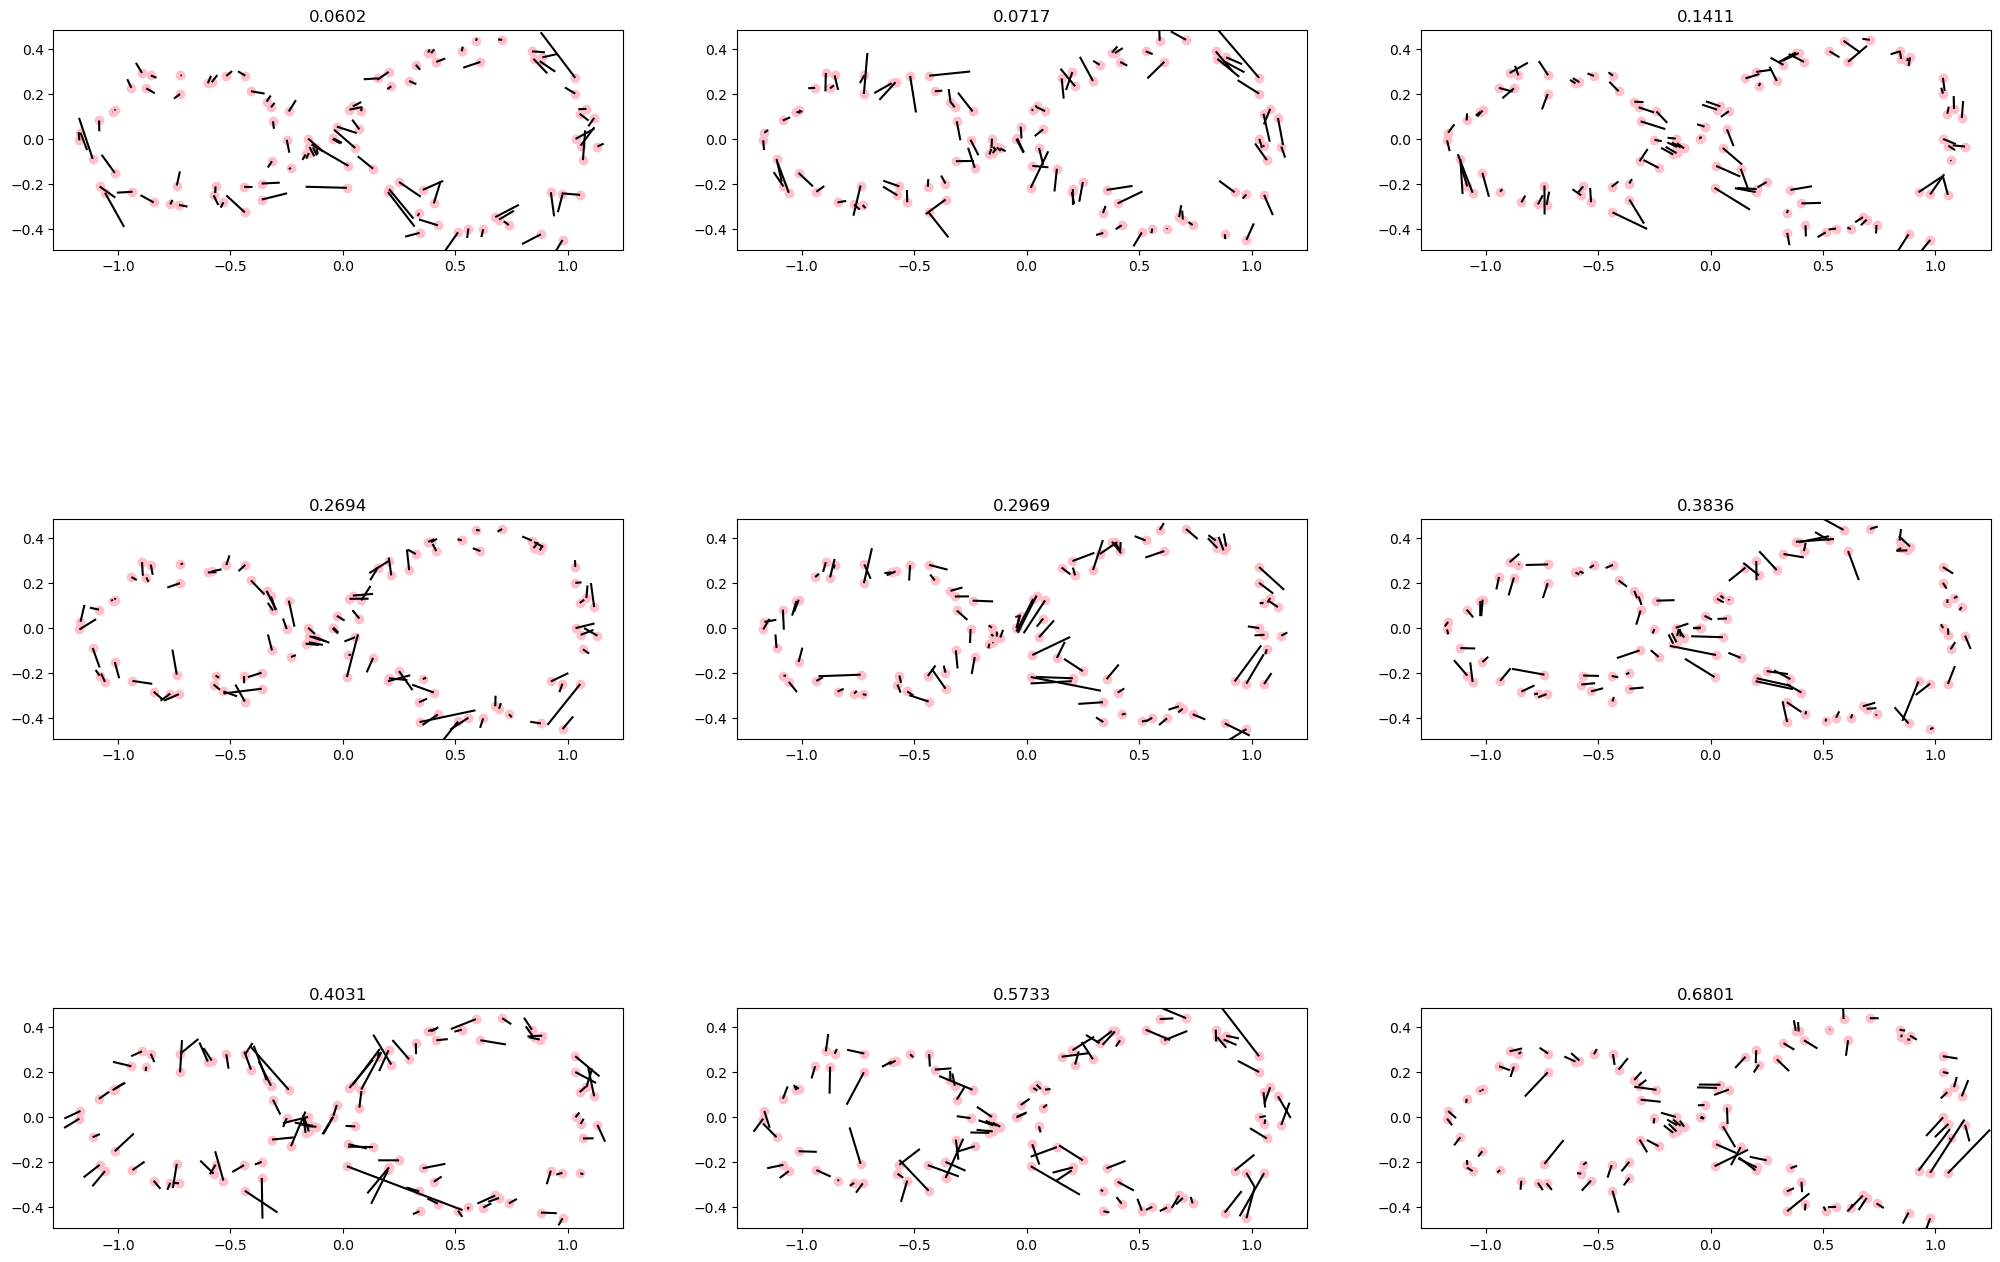

In [7]:
G1_vf = Frame1_VF(u, lam, D, parameters)
plot_1forms_2d(data, 0.7*U[:,0:], L[0:], u, G1_vf, D, 3, 3, parameters)
# plot_1forms_2d(data, 1*U[:,9:], L[9:], u, G1_vf, D, 3, 3, parameters)


# def vector_field_directions(v, u, D, data, G1_vf, parameters):
#     n0 = parameters['n0']
#     base_points = u.T @ (u * D) @ data
#     vectors = u.T @ (G1_vf @ v).reshape(n0,n0) @ (u @ data)
#     return base_points, vectors

# def plot_1form_3d(data, v, u, G1_vf, D, parameters):
#     base_points, vectors = vector_field_directions(v, u, D, data, G1_vf, parameters)
#     fig = go.Figure(data=go.Cone(
#                                 x=base_points[:,0],
#                                 y=base_points[:,1],
#                                 z=base_points[:,2],
#                                 u=vectors[:,0],
#                                 v=vectors[:,1],
#                                 w=vectors[:,2],
#                                 sizemode="scaled",
#                                 sizeref=0.7,
#                                 colorscale=[[0, 'gray'], [1,'gray']],
#                                 showscale=False,
#                                 anchor="tip"))
#     fig.update_layout(scene_aspectmode='data',
#                       width = 800,
#                       height = 600)
#     fig.update_coloraxes(cmax = cap,
#                          cmin = -cap,
#                          cmid = 0)
#     fig.show()

# k = 5
# plot_1form_3d(data, U[:,k], u, G1_vf, D, parameters)


In [ ]:

f0 = 0.2*U[:,0]
f1 = 0.2*U[:,1]
lin = np.linspace(-1,1,9)
interp = lin.reshape(-1,1)*f1 + (1-lin).reshape(-1,1)*f0
interp[:,0]
fn_basis_g1 = (u.T @ np.einsum('si,ti,stl->li', interp.T, interp.T, g1)).transpose()
plot_1forms_2d(data, interp.T, lin, u, G1_vf, D, 3, 3, parameters)
plot_functions_2d(fn_basis_g1, data, lin, 
                  3, 3, cap = fn_basis_g1[:4].max()*0.5)

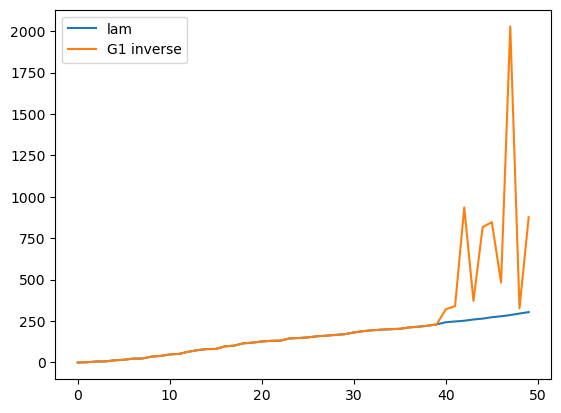

In [10]:
G1_proj, G1_proj_inv, G1_inv, P1 = eig_projection(G1, tol = 1e-2)

d0_w = ext_derivative0_weak(u, D, lam, parameters)
d0 = G1_inv @ d0_w
# plot_1forms_2d(data, 0.3*d0, L[0:], u, G1_vf, D, 3, 3, parameters)
# print((d0_w.T @ G1_inv @ d0_w).diagonal())
# print((d0_w.T @ np.linalg.inv(G1) @ d0_w).diagonal())
# print(lam)
up = d0_w.T @ G1_inv @ d0_w
s_up = eigh(up)[0]
plt.plot(lam)
# plt.plot(up.diagonal())
plt.plot((d0_w.T @ np.linalg.inv(G1) @ d0_w).diagonal())
plt.legend(('lam', 'G1 inverse'))

In [11]:
(np.linalg.inv(G1) @ d0_w)[14]
# (G1_inv @ d0_w)[14]

array([   -0.        ,     0.        ,    -0.        ,    -0.00000001,
           0.00000001,    -0.        ,    -0.00000001,    -0.00000002,
           0.        ,    -0.00000001,     0.00000002,    -0.00000002,
           0.00000001,     0.00000001,   275.55965798,     0.        ,
          -0.        ,     0.        ,     0.00000004,    -0.00000002,
          -0.00000003,     0.00000001,    -0.        ,    -0.00000001,
           0.00000005,     0.00000004,    -0.00000004,     0.00000003,
          -0.00000005,     0.00000003,     0.00000004,    -0.00000001,
           0.00000004,     0.00000008,     0.00000007,     0.00000004,
          -0.        ,    -0.00000002,     0.00000005,    -0.00000006,
       -1152.32691955,  -153.61057501,  4210.23407207,  1625.61637774,
       -4292.53728245, -4347.73563987,  3351.50972817, -6771.70140692,
       -2729.30165484,  4083.00516776])

In [ ]:
n/u[0,0]

In [ ]:
k = 5
print((d0_w.T @ G1_inv @ d0_w)[k])
print((d0_w.T @ np.linalg.inv(G1) @ d0_w)[k])
print(lam[k])

In [ ]:
G1_proj, G1_proj_inv, G1_inv, P1 = eig_projection(G1, tol = 1e-3)

# lam_new, u_new = eigh(d0_w.T @ np.linalg.inv(G1) @ d0_w)
lam_new, u_new = eigh(d0_w.T @ G1_inv @ d0_w)

# plt.scatter(data[:,0], data[:,1], c = u_new[k])
plot_functions_2d((u.T @ u_new).T[7:], data, lam_new[7:], 7, 5)

In [ ]:
plot_functions_2d(u, data[:,:2], lam, 4, 3)

In [ ]:
g1 = metric1(u, lam, D, parameters)
fn_basis_g1 = (u.T @ np.einsum('si,ti,stl->li', U, U, g1)).transpose()

plot_functions_2d(fn_basis_g1, data, L, 
                  3, 3, cap = fn_basis_g1[:4].max()*0.5)

Compute the wedge product W01 of 0 and 1 forms.

In [ ]:
W01 = wedge_product_matrix01(C3, parameters)

In [ ]:
v = 1*U[:,2]
k = 2
uu = np.eye(n0)[k]
wedge = wedge01(uu,v,W01)

def vector_field_vis(v, u, D, data, G1_vf, n1, n2):
    base_points = u.T @ (u * D) @ data
    end_points = base_points + 5 * u.T @ (G1_vf @ v).reshape(n0,n0) @ (u @ data)
    return base_points, end_points

fig, ax = plt.subplots(1,2, figsize = (20,10))

base_points, end_points = vector_field_vis(v, u, D, data, G1_vf, n1, n2)
ax[0].set_aspect('equal')
ax[0].scatter(base_points[:,0], base_points[:,1], c = u[k])
lc = mc.LineCollection(np.stack((base_points, end_points), axis = 1), color = 'gray')
ax[0].add_collection(lc)

base_points, end_points = vector_field_vis(wedge, u, D, data, G1_vf, n1, n2)
ax[1].set_aspect('equal')
ax[1].scatter(base_points[:,0], base_points[:,1], c = 'pink')
lc = mc.LineCollection(np.stack((base_points, end_points), axis = 1), color = 'k')
ax[1].add_collection(lc)

Testing the Leibniz rule.

In [ ]:
# k = 3
# uu = np.eye(n0)[k]
# uu[3] = 2
# uu[2] = -3

C = (u.reshape(n0,1,1,n)*u.reshape(1,n0,1,n)*u.reshape(1,1,n0,n)*D).mean(axis=-1)

uu = np.zeros(n0)
uu[:n2] = np.random.randn(n2)

uu2 = np.zeros(n0)
uu2[:n2] = np.random.randn(n2)

uu = np.random.randn(n0)
uu2 = np.random.randn(n0)

f = uu.T @ u

v = d0 @ uu
# v = U[:,0]

def vector_field_vis(v, u, D, data, G1_vf, n1, n2):
    base_points = u.T @ (u * D) @ data
    end_points = base_points + 2 * u.T @ (G1_vf @ v).reshape(n0,n0) @ (u @ data)
    return base_points, end_points

fig, ax = plt.subplots(1, 2, figsize = (15,15))

# d(uu*uu2)
v = d0 @ np.einsum('i,ijk,j->k', uu, C, uu2) * n
base_points, end_points = vector_field_vis(v, u, D, data, G1_vf, n1, n2)
ax[0].set_aspect('equal')
ax[0].scatter(base_points[:,0], base_points[:,1], c = 'pink')
lc = mc.LineCollection(np.stack((base_points, end_points), axis = 1), color = 'k')
ax[0].add_collection(lc)
ax[0].set_title('d(fg)')

# uu d(uu2) + uu2 d(uu)
v = wedge01(uu, d0 @ uu2, W01) + wedge01(uu2, d0 @ uu, W01)
base_points, end_points = vector_field_vis(v, u, D, data, G1_vf, n1, n2)
ax[1].set_aspect('equal')
ax[1].scatter(base_points[:,0], base_points[:,1], c = 'pink')
lc = mc.LineCollection(np.stack((base_points, end_points), axis = 1), color = 'k')
ax[1].add_collection(lc)
ax[1].set_title('fd(g) + gd(f)')

diff = (wedge01(uu, d0 @ uu2, W01) + wedge01(uu2, d0 @ uu, W01) - d0 @ np.einsum('i,ijk,j->k', uu, C, uu2))
print(diff[:n1])
diff.T @ G1 @ diff

In [ ]:
C4, G2 = Frame2(u, lam, D, parameters)
d1_w = ext_derivative1_weak(u, d0_w, parameters)

def eig_projection(G1, tol = 1e-3):
    S, U = eigh(G1)
    min_index = np.where(S > S[-1]*tol)[0][0]
    P1 = U[:,min_index:]
    # G1_proj = P1.T @ G1 @ P1
    G1_proj = diags(S[min_index:])
    G1_proj_inv = diags(1/S[min_index:])
    G1_inv = P1 @ G1_proj_inv @ P1.T
    return G1_proj, G1_proj_inv, G1_inv, P1

G1_proj, G1_proj_inv, G1_inv, P1 = eig_projection(G1)
G2_proj, G2_proj_inv, G2_inv, P2 = eig_projection(G2)


d1_w.T @ G2_inv @ d1_w

In [ ]:
# UD1 = Up_Energy1(C3, lam, parameters)
# UD1_proj = P1.T @ UD1 @ P1

# # G2_proj, G2_proj_inv, G2_inv, P2 = eig_projection(G2, tol=1e-3)
# # UD1_proj = P1.T @ d1_w.T @ G2_inv @ d1_w @ P1

# # print(eigh(G1_proj)[0].min())
# L, U = sp.linalg.eigh(UD1_proj, G1_proj.toarray())
# try:
#     pos = np.where(L<0)[0][-1] + 1
# except:
#     pos = 0
# L, U = L[pos:], U[:,pos:]
# U = P1 @ U

# mL = np.array(eng.eig(D1_proj, G1_proj))[::-1].flatten()
# mL.sort()
# print('Spectrum of Delta1:\n',L)
# print(mL)
# print(lam[:L.shape[0]])

# G1_vf = Frame1_VF(u, lam, D, parameters)
# plot_1forms_2d(data, 0.8*U[:,0:], L[0:], u, G1_vf, D, 3, 2, parameters)

UD1 = Up_Energy1(C3, lam, parameters)
down = D1 - UD1

G2_proj, G2_proj_inv, G2_inv, P2 = eig_projection(G2, tol=1e-4)
D1_new = d1_w.T @ G2_inv @ d1_w + down
D1_new = D1

D1_proj_new = P1.T @ D1_new @ P1

# print(eigh(G1_proj)[0].min())
L, U = sp.linalg.eigh(D1_proj_new, G1_proj.toarray())
try:
    pos = np.where(L<0)[0][-1] + 1
except:
    pos = 0
L, U = L[pos:], U[:,pos:]
U = P1 @ U

# mL = np.array(eng.eig(D1_proj, G1_proj))[::-1].flatten()
# mL.sort()
print('Spectrum of Delta1:\n',L)
# print(mL)
# print(lam[:L.shape[0]])

G1_vf = Frame1_VF(u, lam, D, parameters)
plot_1forms_2d(data, 0.8*U[:,0:], L[0:], u, G1_vf, D, 3, 2, parameters)

Lie bracket.

In [ ]:
LB = lie_bracket_matrix(G1_vf, G1_proj, P1, parameters)

In [ ]:
v = np.random.randn(n1*n2)
w = np.random.randn(n1*n2)

v = 1*U[:,0]
w = 1*U[:,1]

bracket = bilinear(v, w, LB)

def vector_field_vis(v, u, D, data, G1_vf, n1, n2):
    base_points = u.T @ (u * D) @ data
    end_points = base_points + 5 * u.T @ (G1_vf @ v).reshape(n0,n0) @ (u @ data)
    return base_points, end_points

fig, ax = plt.subplots(1, 3, figsize = (20,15))

# v
base_points, end_points = vector_field_vis(v, u, D, data, G1_vf, n1, n2)
ax[0].set_aspect('equal')
ax[0].scatter(base_points[:,0], base_points[:,1], c = 'pink')
lc = mc.LineCollection(np.stack((base_points, end_points), axis = 1), color = 'k')
ax[0].add_collection(lc)
ax[0].set_title('X')

# w
base_points, end_points = vector_field_vis(w, u, D, data, G1_vf, n1, n2)
ax[1].set_aspect('equal')
ax[1].scatter(base_points[:,0], base_points[:,1], c = 'pink')
lc = mc.LineCollection(np.stack((base_points, end_points), axis = 1), color = 'k')
ax[1].add_collection(lc)
ax[1].set_title('Y')

# [u,v]
base_points, end_points = vector_field_vis(bracket, u, D, data, G1_vf, n1, n2)
ax[2].set_aspect('equal')
ax[2].scatter(base_points[:,0], base_points[:,1], c = 'pink')
lc = mc.LineCollection(np.stack((base_points, end_points), axis = 1), color = 'k')
ax[2].add_collection(lc)
ax[2].set_title('[X,Y]')

In [ ]:
fig, ax = plt.subplots(2, 4, figsize = (25,10))

v = U[:,0]
v_vf = (G1_vf @ v).reshape(n0,n0)
vals, vecs = scipy.linalg.eig(v_vf)
vecsi = np.linalg.inv(vecs)

# fig, ax = plt.subplots(1,2,figsize = (15,6))

base_points, end_points = vector_field_vis(-1*v, u, D, data, G1_vf, n1, n2)
ax[0,0].set_aspect('equal')
ax[0,0].scatter(base_points[:,0], base_points[:,1], c = 'pink')
lc = mc.LineCollection(np.stack((base_points, end_points), axis = 1), color = 'k')
ax[0,0].add_collection(lc)
ax[0,0].set_title('X')

# ax[1].set_aspect('equal')
# ax[1].scatter(data[:,0], data[:,1], c = u.T @ ct @ np.eye(n0)[3])#, vmin = -cap, vmax = cap)

for i in range(2):
    for j in range(4):
        if 4*i+j > 0:
            ct = -(vecs * vals**(0.4*(4*i+j-1))) @ vecsi
            ax[i,j].set_aspect('equal')
            ax[i,j].scatter(FT[:,0], FT[:,1], c = u.T @ ct @ np.eye(n0)[2])#, vmin = -cap, vmax = cap)
            ax[i,j].set_title(0.4*(4*i+j-1))


Levi-Civita connection.

In [ ]:
X = U[:,0]
Y = U[:,1]
Z = U[:,2]

X,Y,Z = np.random.randn(n1*n2),np.random.randn(n1*n2),np.random.randn(n1*n2)

# LCC1 = ((G1 @ X).reshape(n1,n2) @ np.einsum('i,ijk,j->k', Y, g1, Z)[:n2])[0]
# LCC1 += ((G1 @ Y).reshape(n1,n2) @ np.einsum('i,ijk,j->k', Z, g1, X)[:n2])[0]
# LCC1 -= ((G1 @ Z).reshape(n1,n2) @ np.einsum('i,ijk,j->k', X, g1, Y)[:n2])[0]
# LCC1 *= n/u[0,0]
# LCC2 = lie_bracket(X, Y, G1, G1_proj, P1, parameters).T @ G1 @ Z
# LCC2 -= lie_bracket(Y, Z, G1, G1_proj, P1, parameters).T @ G1 @ X
# LCC2 += lie_bracket(X, Z, G1, G1_proj, P1, parameters).T @ G1 @ Y
# LCC = (LCC1 + LCC2)/2

def Levi_Civita_matrix(G1, G1_proj, g1, P1, parameters):
    n,n1,n2 = parameters['n'], parameters['n1'], parameters['n2']
    # \int X(g(Y,Z))
    LCC1 = np.einsum('ijk,lmj->klmi', G1.reshape(n1,n2,n1*n2), g1[:,:,:n2])[:,:,:,0]*(1/u[0,0])
    # \int X(g(Y,Z)) + \int Y(g(Z,X)) - \int Z(g(X,Y))
    LCC1 = LCC1 + LCC1.transpose((1,0,2)) - LCC1.transpose((2,1,0))
    # <[X,Y],Z>
    LCC2 = np.einsum('ijk,kl', LB, G1)
    # <[X,Y],Z> - <[Y,Z],X> + <[Z,X],Y>
    LCC2 = LCC2 - LCC2.transpose((2,0,1)) + LCC2.transpose((0,2,1))
    LCC = (LCC1 + LCC2)/2
    # Convert the variational form into the frame representation with the pseudo-inverse of G1.
    LCC = np.einsum('ijk,kl', LCC, P1/G1_proj.diagonal())
    LCC = np.einsum('ijk,kl', LCC, P1.T)
    return LCC

LCC = Levi_Civita_matrix(G1, G1_proj, g1, P1, parameters)

In [ ]:
LCC = Levi_Civita_matrix(G1, G1_proj, g1, P1, parameters)

v = U[:,0]
w = U[:,2]

connection = bilinear(v, w, LCC)

def vector_field_vis(v, u, D, data, G1_vf, n1, n2):
    base_points = u.T @ (u * D) @ data
    end_points = base_points + 5 * u.T @ (G1_vf @ v).reshape(n0,n0) @ (u @ data)
    return base_points, end_points

fig, ax = plt.subplots(1, 3, figsize = (20,15))

# v
base_points, end_points = vector_field_vis(v, u, D, data, G1_vf, n1, n2)
ax[0].set_aspect('equal')
ax[0].scatter(base_points[:,0], base_points[:,1], c = 'pink')
lc = mc.LineCollection(np.stack((base_points, end_points), axis = 1), color = 'k')
ax[0].add_collection(lc)

# w
base_points, end_points = vector_field_vis(w, u, D, data, G1_vf, n1, n2)
ax[1].set_aspect('equal')
ax[1].scatter(base_points[:,0], base_points[:,1], c = 'pink')
lc = mc.LineCollection(np.stack((base_points, end_points), axis = 1), color = 'k')
ax[1].add_collection(lc)

# grad v(w)
base_points, end_points = vector_field_vis(connection, u, D, data, G1_vf, n1, n2)
ax[2].set_aspect('equal')
ax[2].scatter(base_points[:,0], base_points[:,1], c = 'pink')
lc = mc.LineCollection(np.stack((base_points, end_points), axis = 1), color = 'k')
ax[2].add_collection(lc)

Hodge decomposition.

In [ ]:
d_projection = delta_projection(G1, parameters)

v = U[:,1]
v1 = d_projection @ v
v2 = v - v1
f = u[:n2].T @ v1[:n2]

print((v1.T @ G1 @ v1).round(4), (v2.T @ G1 @ v2).round(4))

def vector_field_vis(v, u, D, data, G1_vf, n1, n2):
    base_points = u.T @ (u * D) @ data
    end_points = base_points + 5 * u.T @ (G1_vf @ v).reshape(n0,n0) @ (u @ data)
    return base_points, end_points

fig, ax = plt.subplots(1, 3, figsize = (20,15))

# v
base_points, end_points = vector_field_vis(v, u, D, data, G1_vf, n1, n2)
ax[0].set_aspect('equal')
ax[0].scatter(base_points[:,0], base_points[:,1], c = 'pink')
lc = mc.LineCollection(np.stack((base_points, end_points), axis = 1), color = 'k')
ax[0].add_collection(lc)

# v1
base_points, end_points = vector_field_vis(v1, u, D, data, G1_vf, n1, n2)
ax[1].set_aspect('equal')
ax[1].scatter(base_points[:,0], base_points[:,1], c = -f)
lc = mc.LineCollection(np.stack((base_points, end_points), axis = 1), color = 'k')
ax[1].add_collection(lc)

# v2
base_points, end_points = vector_field_vis(v2, u, D, data, G1_vf, n1, n2)
ax[2].set_aspect('equal')
ax[2].scatter(base_points[:,0], base_points[:,1], c = 'pink')
lc = mc.LineCollection(np.stack((base_points, end_points), axis = 1), color = 'k')
ax[2].add_collection(lc)

Riemann curvature tensor.

In [ ]:
def Riemann_Curvature_tensor(LCC, LB):
    RCT = np.einsum('isl,jks->ijkl', LCC, LCC)
    RCT -= RCT.transpose((1,0,2,3))
    RCT -= np.einsum('ijs,skl->ijkl', LB, LCC)
    return RCT

Riemann = Riemann_Curvature_tensor(LCC, LB)

Ricci curvature tensor.

In [ ]:
(u * D) @ u.T

In [ ]:
orthonormal = P1/(G1_proj.diagonal()**0.5)

trace_factor = (u * D) @ (1 / (u.T @ np.einsum('iis', g1)))
Ricci_sum = np.einsum('ijkl,ils->jks', Riemann, g1)
Ricci = np.einsum('ijs,t,stu->iju', Ricci_sum, trace_factor, C)

Scalar_sum = np.einsum('ijs,ijs->s', Ricci, g1)
Scalar_sum = np.einsum('iis->s', Ricci)
Scalar = np.einsum('i,j,ijk->k', Scalar_sum, trace_factor, C)
 
scalar_fn_coords = u.T @ Scalar
fig, ax = plt.subplots()
ax.scatter(data[:,0],data[:,1], c = scalar_fn_coords, 
           vmax= 0.7*scalar_fn_coords.max(), 
           vmin = -0.7*scalar_fn_coords.max())

# fig, ax = plt.subplots()
# ax.scatter(data[:,0],data[:,1], c = u.T @ np.einsum('ijs,i,j', Ricci, U[:,1], U[:,2]))

In [ ]:
u.T @ Scalar

In [ ]:
G1_vf = Frame1_VF(u, lam, D, parameters)
plot_1forms_2d(data, U, L, u, G1_vf, D, 3, 3, parameters)

In [ ]:
Ricci

In [ ]:
(u.T @ Ricci_sum)/(u.T @ np.einsum('iis', g1))

Compute the carre du champ and Gram matrix for 2-forms.

In [ ]:
# tensorG2 = np.einsum('aist,bjs,ckt->abcijk', C4, CdC[:n2,:n2], CdC[:n2,:n2]) - np.einsum('aist,bks,cjt->abcijk', C4, CdC[:n2,:n2], CdC[:n2,:n2])
# G2 = tensorG2.reshape(n1*n2*n2,n1*n2*n2)

tensorCdC2 = np.einsum('iks,jlt,stu->ijkl', CdC, CdC, C) - np.einsum('ils,jkt,stu->ijkl', CdC, CdC, C)
CdC2 = tensorCdC2.reshape(n2*n2,n2*n2)

# cikjl = np.einsum('ijs,kls->ikjl', cijk, cijk[:n2,:n2])
# cikjl1 = np.einsum('ijs,kls,s->ikjl', cijk, cijk[:n2,:n2], lam[:n0])
# tensorG1 = (1/2)*((lam[:n2].reshape(1,-1,1,1)+lam[:n2].reshape(1,1,1,-1))*cikjl - cikjl1)

# prods = u[:n1].reshape(n1,1,n)*u[:n1].reshape(1,n1,n)
# CdC = ((lam[:n2].reshape(-1,1,1)+lam[:n2].reshape(1,-1,1))*prods[:n2,:n2] - (del0@prods[:n2,:n2].reshape(n2,n2,n,1)).reshape(n2,n2,n))/2
# tensorG1 = (CdC.reshape(1,n2,1,n2,n)*prods.reshape(n1,1,n1,1,n)*D).mean(axis = -1)
# G1 = tensorG1.reshape(n1*n2,n1*n2)

# eigh(G1)[0]

In [ ]:
eigh(CdC2)[0]

In [ ]:
# CdC2 = CdC.reshape(n2,1,n2,1,n)*CdC.reshape(1,n2,1,n2,n) - CdC.reshape(1,n2,n2,1,n)*CdC.reshape(n2,1,1,n2,n)
# tensorG2 = (CdC2.reshape(1,n2,n2,1,n2,n2,n)*prods.reshape(n1,1,1,n1,1,1,n)*D).mean(axis = -1)
# G2 = tensorG2.reshape(n1*n2**2,n1*n2**2)

In [ ]:
metricG2 = (CdC2.reshape(1,n2,n2,1,n2,n2,n)*prods.reshape(n1,1,1,n1,1,1,n)*D).reshape(n1*n2**2,n1*n2**2,n)

In [ ]:
v.T @ G2 @ v

In [ ]:
K = 17
KK = 10

v = np.zeros((n1*n2**2,1))
v[K] = 1
v[KK] = 1
print(G2[K,K])
base_points = u.T @ (u * D) @ data

v1 = v.reshape(n1,n2,n2).sum(axis=1).flatten()
v2 = v.reshape(n1,n2,n2).sum(axis=2).flatten()

v1_vecs = 1 * u[:n1].T @ (G1 @ v1).reshape(n1,n2) @ (u @ data)[:n2]
v2_vecs = 1 * u[:n1].T @ (G1 @ v2).reshape(n1,n2) @ (u @ data)[:n2]

v1_lengths = np.linalg.norm(v1_vecs, axis=1)
v2_lengths = np.linalg.norm(v2_vecs, axis=1)

areas = (v.T @ metricG2.transpose(2,0,1) @ v).flatten()
areas = np.sqrt(areas)
v1_vecs *= (areas/v1_lengths).reshape(-1,1)
v2_vecs *= (areas/v2_lengths).reshape(-1,1)

v1_ends = v1_vecs + base_points
v2_ends = v2_vecs + base_points

fig, ax = plt.subplots(figsize = (10,10))
ax.set_aspect('equal')
ax.scatter(base_points[:,0], base_points[:,1], c = 'k')
# ax.scatter(end_points[:,0], end_points[:,1]) , c = u[K]

vertices={"x": np.stack((base_points[:,0], v1_ends[:,0], v2_ends[:,0]), axis = 1).T,
          "y": np.stack((base_points[:,1], v1_ends[:,1], v2_ends[:,1]), axis = 1).T}
ax.fill("x","y",data=vertices, c='red')

# lc1 = mc.LineCollection(np.stack((base_points, v1_ends), axis = 1), color = 'gray')
# lc2 = mc.LineCollection(np.stack((base_points, v2_ends), axis = 1), color = 'gray')
# ax.add_collection(lc1)
# ax.add_collection(lc2)

plt.show()